# Assignment 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma
import scipy.constants as const

In [99]:
d = np.array([-0.00021453, -0.00024499])
d_sigma = 1E-5

# Joint prior

Since the data have uncertainty $\sigma$ and we have two data points, the space they live in is $[d_{obs} - \sigma, d_{obs} + \sigma]\times[d_{obs} - \sigma, d_{obs} + \sigma]$. Since they are uniformly distributed the density is $\frac{1}{(2\sigma)\times(2\sigma)}=\frac{1}{4\sigma^2}$. Or,
$$
p_d = \frac{1}{|\mathcal{D}|}
$$

where $\mathcal{D}$ is the 2D space the data live.

The $\rho$ all live in the space $[-500,0]\ kg/m^3$, so for $\Delta\rho^{(1)}$

$$
p_r(\Delta\rho^{(1)}) = \frac{1}{500}
$$

but for $(\Delta\rho^{(2)_1}, \Delta\rho^{(2)_2})$ they live in $[-500,0]\times[-500,0]$ and so

$$
p_r(\Delta\rho^{(2)_1}, \Delta\rho^{(2)_2}) = \frac{1}{500^2}
$$

The hyper parameter $k$ is also uniformly distributed and so

$$
p_k(k) = \frac{1}{2}
$$

The full joint prior is then


$$
p_{d,m,k} = \begin{cases} 
\frac{1}{2}\frac{1}{500}\frac{1}{4\sigma^2} & \text{for k = 1 }\wedge \Delta\rho\in[-500,0]\ \wedge d\in[d_{obs} \pm \sigma]^2\\
\frac{1}{2}\frac{1}{500^2}\frac{1}{4\sigma^2} & \text{for k = 2 }\wedge \Delta\rho_1, \Delta\rho_2 \in[-500,0]^2\wedge d\in[d_{obs} \pm \sigma]^2 \\
0 \text{ otherwise}
\end{cases}
$$




# Complete posterior

Substituting the forward relation $g(\Delta\rho)$ for $d$ leaves the joint prior with the same terms but conditioned differently.

So $\Delta\rho,k$ are left unchanged and the forwarded data still live within $\mathcal{D}$. But now the values for $\Delta\rho$ that give a non-zero density must obey $g(\Delta\rho)\in \mathcal{D}$.

The posterior will look something like this:

$$
p_{d,m,k}^{post} = \begin{cases} 
\frac{1}{2}\frac{1}{(r_{max} - r_{min})}\frac{1}{\mathcal{D}} & \text{for k = 1 }\wedge g(s)\in[d_{obs} \pm \sigma]   \\
\frac{1}{2}\frac{1}{(r_{max} - r_{min})^2}\frac{1}{\mathcal{D}} & \text{for k = 2 }\wedge g(s_1), g(s_2) \in[d_{obs} \pm \sigma] \\
0 \text{ otherwise}
\end{cases}
$$


To work out the values for $\Delta\rho\in\mathcal{S}_1$ and $(\Delta\rho_1,\Delta\rho_2)\in\mathcal{S}_2$ that $\Delta\rho$ live in I must invert the forward model




$$
\Delta g(m) = 2\pi G \Delta\rho [(b_{top} - h_{top}) - (b_{bot} - h_{bot})]
$$

$$
\Delta\rho = \frac{\Delta g(m)}{2\pi G [(b_{top} - h_{top}) - (b_{bot} - h_{bot})]}
$$

## $\mathcal{S}_1$

Let $L_{d1} = 2\pi G [(b_{top} - h_{top}) - (b_{bot} - h_{bot})]$ and $L_{d2} = 2\pi G [(b_{top} - h_{top}) - (b_{bot} - h_{bot})]$ be the total distance calculation for each of the data points at $d_1$ and $d_2$ respectively

$$
\Delta\rho = \frac{\Delta g(m)}{L}
$$

$$
\Delta\rho \in [\frac{\hat{d}_{min}}{L_{d1}}, \frac{\hat{d}_{max}}{L_{d2}}] = \mathcal{S}_1
$$


Where $\hat{d}_{min}=\max{(d_{1,min}, d_{2,min})}$ and $\hat{d}_{max}=\min{(d_{1,max}, d_{2,max})}$

## $\mathcal{S}_2$

The case for $k=2$ is slightly more complicated. I require that the forwarded data are within the data space. For instance, for the lower limit of the first datapoint

$$
d_{1,min} \leq g(\Delta\rho_1) + g(\Delta\rho_2)
$$

Expanding the expression for $\Delta g$

$$
2\pi G \left[2\pi G\Delta\rho_1 [(b_{top} - h_{top}) - (b_{bot} - h_{bot})] + 2\pi G\Delta\rho_2 [(b_{top} - h_{top}) - (b_{bot} - h_{bot})] \right] = 2\pi G\left[a_1\Delta\rho_1 + a_2\Delta\rho_2\right]
$$

where I have called the geometric factors for $a$. The respective $b$ and $t$ are not the same for both $\Delta\rho$.

The restrictions on $\Delta\rho$ are therefore

$$
\frac{d_{1,min}}{2\pi G} \leq \left[a_{11}\Delta\rho_1 + a_{12}\Delta\rho_2\right] \leq \frac{d_{1,max}}{2\pi G}
$$

$$
\frac{d_{2,min}}{2\pi G} \leq \left[a_{21}\Delta\rho_1 + a_{22}\Delta\rho_2\right] \leq \frac{d_{2,max}}{2\pi G}
$$

And with the computed values

$$
-5.3541\cdot 10^5 \leq \left[1633.5\cdot\Delta\rho_1 + 412.80\cdot\Delta\rho_2\right] \leq -4.8772\cdot 10^5
$$

$$
-6.0805\cdot 10^5 \leq \left[1866.5\cdot\Delta\rho_1 + 470.34\cdot\Delta\rho_2\right] \leq -5.6036\cdot 10^5
$$


$$
\mathcal{S}_2 = \left\{\Delta\rho_1,\Delta\rho_2 \middle|      -5.3541\cdot 10^5 \leq \left[1633.5\cdot\Delta\rho_1 + 412.80\cdot\Delta\rho_2\right] \leq -4.8772\cdot 10^5            \wedge              -6.0805\cdot 10^5 \leq \left[1866.5\cdot\Delta\rho_1 + 470.34\cdot\Delta\rho_2\right] \leq -5.6036\cdot 10^5           \right\}
$$

The posterior finally looks like this

$$
p_{d,m,k}^{post} = \begin{cases} 
\frac{1}{2}\frac{1}{500}\frac{1}{4\sigma^2} & \text{for k = 1 }\wedge \Delta\rho\in\mathcal{S}_1   \\
\frac{1}{2}\frac{1}{500^2}\frac{1}{4\sigma^2} & \text{for k = 2 }\wedge (\Delta\rho_1, \Delta\rho_2)\in\mathcal{S}_2 \\
0 \text{ otherwise}
\end{cases}
$$

where $\mathcal{S}_1$ and $\mathcal{S}_2$ are the previously described sets.

To compute the integral for the solutions, since they have a constant density, it is enough to compute the line segment and area respectively.

## For k=1

It is bounded in the range

$$
\Delta\rho \in \mathcal{S}_1 = \left[\frac{\hat{d}_{min}}{L_{d1}}, \frac{\hat{d}_{max}}{L_{d2}}\right]
$$

In [112]:
k1_density = (1/2) * (1/500) * (1/(4*d_sigma**2))
k2_density = (1/2) * (1/500**2) * (1/(4*d_sigma**2))

def k1_L():
    """
    Computing the forward relation for k=1
    Lots of computations so hopefully it is correct.
    """

    radius = 4700

    k1d1htop = 1000
    k1d1hbot = k1d1htop+4400
    k1d1btop = ma.sqrt(k1d1htop**2 + radius**2)
    k1d1bbot = ma.sqrt(k1d1hbot**2 + radius**2)

    k1d2htop = 500
    k1d2hbot = k1d2htop+4400
    k1d2btop = ma.sqrt(k1d2htop**2 + radius**2)
    k1d2bbot = ma.sqrt(k1d2hbot**2 + radius**2)

    Ld1 = ((k1d1btop-k1d1htop) - (k1d1bbot-k1d1hbot))
    Ld2 = ((k1d2btop-k1d2htop) - (k1d2bbot-k1d2hbot))

    return Ld1, Ld2

Ld1, Ld2 = k1_L()



d_hat_min = (d-d_sigma).max()
d_hat_max = (d+d_sigma).min()
print(f"d_hat_min: {d_hat_min:.5g}, d_hat_min: {d_hat_max:.5g}")
print(d)
print(d-d_sigma)
print(d+d_sigma)


k1_rho_min = d_hat_min/(2 * const.pi * const.G * Ld1)
k1_rho_max = d_hat_max/(2 * const.pi * const.G * Ld2)
k1_line_segment = k1_rho_max - k1_rho_min
k1_sum = k1_density * k1_line_segment
print(f"From {k1_rho_max:.5g} to {k1_rho_min:.5g}, line segment: {k1_line_segment:.5g}, integral: {k1_sum:.5g}")

d_hat_min: -0.00022453, d_hat_min: -0.00023499
[-0.00021453 -0.00024499]
[-0.00022453 -0.00025499]
[-0.00020453 -0.00023499]
From -239.79 to -261.65, line segment: 21.856, integral: 5.464e+07


Integrating over $\Delta\rho$ for $k=1$ gives

$$
p_k^{post}(1) = 21.856 \cdot \frac{1}{2}\frac{1}{500}\frac{1}{4\sigma^2} = 5.464\cdot 10^7
$$

## For k=2

To find the bounded area to integrate over I can write four equations of $\rho_2$ as a function of $\rho_1$, each data point bounded by lower and upper bound. For the lower bound of $d_1$

$$
\frac{d_{1,min}}{2\pi G} = a_{11}\Delta\rho_1 + a_{12}\Delta\rho_2
$$

$$
\frac{d_{1,min}}{2\pi G} - a_{11}\Delta\rho_1 = a_{12}\Delta\rho_2
$$


$$
\Delta\rho_2 = \frac{\frac{d_{1,min}}{2\pi G} - a_{11}\Delta\rho_1}{a_{12}}
$$

Similarly,

$$
\Delta\rho_2 = \frac{\frac{d_{1,max}}{2\pi G} - a_{11}\Delta\rho_1}{a_{12}}
$$

$$
\Delta\rho_2 = \frac{\frac{d_{1,min}}{2\pi G} - a_{21}\Delta\rho_1}{a_{22}}
$$

$$
\Delta\rho_2 = \frac{\frac{d_{1,max}}{2\pi G} - a_{21}\Delta\rho_1}{a_{22}}
$$

I then plot the functions to see the bounded area.

In [91]:
def k2_L():
    """
    Computing the geometry factors for for k=2
    """

    radius = 4700

    ## Top cylinder
    k2d1htopT = 1000
    k2d1hbotT = k2d1htopT+3000
    k2d1btopT = ma.sqrt(k2d1htopT**2 + radius**2)
    k2d1bbotT = ma.sqrt(k2d1hbotT**2 + radius**2)

    k2d2htopT = 500
    k2d2hbotT = k2d2htopT+3000
    k2d2btopT = ma.sqrt(k2d2htopT**2 + radius**2)
    k2d2bbotT = ma.sqrt(k2d2hbotT**2 + radius**2)


    ## Bot cylinder
    k2d1htopB = 1000+3000
    k2d1hbotB = k2d1htopB+1400
    k2d1btopB = ma.sqrt(k2d1htopB**2 + radius**2)
    k2d1bbotB = ma.sqrt(k2d1hbotB**2 + radius**2)

    k2d2htopB = 500+3000
    k2d2hbotB = k2d2htopB+1400
    k2d2btopB = ma.sqrt(k2d2htopB**2 + radius**2)
    k2d2bbotB = ma.sqrt(k2d2hbotB**2 + radius**2)

    L11 = (k2d1btopT-k2d1htopT) - (k2d1bbotT-k2d1hbotT)
    L12 = (k2d1btopB-k2d1htopB) - (k2d1bbotB-k2d1hbotB)
    L21 = (k2d2btopT-k2d2htopT) - (k2d2bbotT-k2d2hbotT)
    L22 = (k2d2btopB-k2d2htopB) - (k2d2bbotB-k2d2hbotB)
    
    return L11, L12, L21, L22

a11, a12, a21, a22 = k2_L()
k2_L()

(1633.4958610097956, 412.7991180456129, 1866.4867896451442, 470.33605088626246)

d1min: -5.3541e+05, d1max: -4.8772e+05, d2min: -6.0805e+05, d2max: -5.6036e+05, 


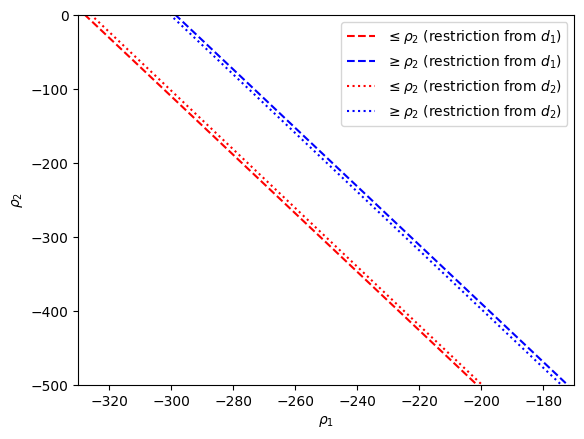

In [113]:
def rho2(rho1, dbound, a, b):
    return (dbound - a*rho1)/b

d1min = (d[0]-d_sigma)/(2*const.pi*const.G)
d1max = (d[0]+d_sigma)/(2*const.pi*const.G)
d2min = (d[1]-d_sigma)/(2*const.pi*const.G)
d2max = (d[1]+d_sigma)/(2*const.pi*const.G)
print(f"d1min: {d1min:.5g}, d1max: {d1max:.5g}, d2min: {d2min:.5g}, d2max: {d2max:.5g}, ")

x = np.linspace(-500, 0, 1000)
y11 = rho2(x, d1min, a11, a12)

y12 = rho2(x, d1max, a11, a12)

y21 = rho2(x, d2min, a21, a22)

y22 = rho2(x, d2max, a21, a22)


plt.plot(x, y11, color="red", linestyle="dashed", label="$\\leq \\rho_2$ (restriction from $d_1$)")
plt.plot(x, y12, color="blue", linestyle="dashed", label="$\\geq \\rho_2 $ (restriction from $d_1$)")
plt.plot(x, y21, color="red", linestyle="dotted", label="$\\leq \\rho_2 $ (restriction from $d_2$)") # These ones
plt.plot(x, y22, color="blue", linestyle="dotted", label="$\\geq \\rho_2 $ (restriction from $d_2$)") # These ones

plt.ylabel("$\\rho_2$")
plt.xlabel("$\\rho_1$")

plt.xlim(-330,-170)
plt.ylim(-500,0)

plt.legend()

The dotted lines are the enclosing ones, meaning the second component of the data is what restricts the domain.

This is a parallelogram so I can just get the side lengths and distances between the lines and compute the area of a parallelogram.

$$
\Delta\rho_2 = \frac{\frac{d_{1,min}}{2\pi G} - a_{21}\Delta\rho_1}{a_{22}} = -\frac{a_{21}}{a_{22}}\Delta\rho_1 + \frac{a_{22}d_{1,min}}{2\pi G}
$$

$$
\Delta\rho_2 = \frac{\frac{d_{1,max}}{2\pi G} - a_{21}\Delta\rho_1}{a_{22}} = -\frac{a_{21}}{a_{22}}\Delta\rho_1 + \frac{a_{22}d_{1,max}}{2\pi G}
$$

Distance is

$$
d = \frac{|\frac{a_{22}d_{1,min}}{2\pi G} - \frac{a_{22}d_{1,max}}{2\pi G}|}{\sqrt{1 + \frac{a_{21}^2}{a_{22}^2}}}
$$


In [119]:
def parallelogram():
    # rho_1(rho_2): Inverse is the same as flipping the a terms
    side_a = rho2(-500, (d[1]-d_sigma)/(2*const.pi*const.G), a22, a21) - rho2(0, (d[1]+d_sigma)/(2*const.pi*const.G), a22, a21)
    side_b = 500
    side_c = ma.sqrt(side_a**2 + side_b**2)

    h = abs((d[1]-d_sigma)/(a22*2*const.pi*const.G) - (d[1]+d_sigma)/(a22*2*const.pi*const.G))
    h = h/ma.sqrt(1 + (a21/a22)**2)

    A = h * side_c

    return A, h, side_c

A,_,_ = parallelogram()

k2_sum = k2_density * A



print(f"k2_sum: {k2_sum}")
print(f"k1_sum: {k1_sum}")

k2_sum: 63180320.98908366
k1_sum: 54640139.18471216


For it to be a probability density I need the entire $k$-space to sum to 1.

$$
K(p_k^{post}(1) + p_k^{post}(2)) = 1
$$

$$
K = \frac{1}{p_k^{post}(1) + p_k^{post}(2)} = \frac{1}{5.4640\cdot 10^7 + 6.3180\cdot 10^7}
$$

In [122]:
K = 1/(k1_sum + k2_sum)
prob_k1 = K*k1_sum
prob_k2 = K*k2_sum

print(f"Model k=1: {prob_k1:.5g}, model k=2: {prob_k2:.5g}")

Model k=1: 0.46376, model k=2: 0.53624


# Conclusion

I therefore conclude that the better model is the more complicated one. I think the difference is large enough to claim that. But if they were closer I, but $k=2$ higher probability that could still mean favoring a simpler model only for since we prefer simpler models that are otherwise competitive. But in this case $k=2$ better explains the data.

d_hat_min: -0.00022453, d_hat_min: -0.00023499
[-0.00021453 -0.00024499]
[-0.00022453 -0.00025499]
[-0.00020453 -0.00023499]


-261.6498835023297

-239.79382782844485

# Integrating the complete posterior over $m$ for each $k$

In [77]:
_,_,Ld1,Ld2 = delta_gk1(0)
Ld1

8.581314732288072e-07

In [83]:
_,_,Ld1T,Ld1B,Ld2T,Ld2B = delta_gk2(0, 0)


## Computing the forward relations

$$
\Delta g = 2\pi G \Delta\rho [(b_{top} - h_{top}) - (b_{bot} - h_{bot})]
$$

In [82]:
def delta_gk1(delta_rho):
    """
    Computing the forward relation for k=1
    Lots of computations so hopefully it is correct.
    """

    radius = 4700

    k1d1htop = 1000
    k1d1hbot = k1d1htop+4400
    k1d1btop = ma.sqrt(k1d1htop**2 + radius**2)
    k1d1bbot = ma.sqrt(k1d1hbot**2 + radius**2)

    k1d2htop = 500
    k1d2hbot = k1d2htop+4400
    k1d2btop = ma.sqrt(k1d2htop**2 + radius**2)
    k1d2bbot = ma.sqrt(k1d2hbot**2 + radius**2)

    #print(f"k1d1htop :{k1d1htop:.1f}, k1d1hbot :{k1d1hbot:.1f}, k1d1btop :{k1d1btop:.1f}, k1d1bbot :{k1d1bbot:.1f}")
    #print(f"k1d2htop :{k1d2htop:.1f}, k1d2hbot :{k1d2hbot:.1f}, k1d2btop :{k1d2btop:.1f}, k1d2bbot :{k1d2bbot:.1f}")
    Ld1 = 2 * const.pi * const.G * ((k1d1btop-k1d1htop) - (k1d1bbot-k1d1hbot))
    Ld2 = 2 * const.pi * const.G * ((k1d2btop-k1d2htop) - (k1d2bbot-k1d2hbot))
    k1d1 = 2 * const.pi * const.G * delta_rho * ((k1d1btop-k1d1htop) - (k1d1bbot-k1d1hbot))
    k1d2 = 2 * const.pi * const.G * delta_rho * ((k1d2btop-k1d2htop) - (k1d2bbot-k1d2hbot))

    return k1d1, k1d2, Ld1, Ld2



def delta_gk2(delta_rho1, delta_rho2):
    """
    Computing the forward relation for k=2
    """

    radius = 4700

    ## Top cylinder
    k2d1htopT = 1000
    k2d1hbotT = k2d1htopT+3000
    k2d1btopT = ma.sqrt(k2d1htopT**2 + radius**2)
    k2d1bbotT = ma.sqrt(k2d1hbotT**2 + radius**2)

    k2d2htopT = 500
    k2d2hbotT = k2d2htopT+3000
    k2d2btopT = ma.sqrt(k2d2htopT**2 + radius**2)
    k2d2bbotT = ma.sqrt(k2d2hbotT**2 + radius**2)

    #print()
    #print("Upper cylinder")
    #print(f"k2d1htopT :{k2d1htopT:.1f}, k2d1hbotT :{k2d1hbotT:.1f}, k2d1btopT :{k2d1btopT:.1f}, k2d1bbotT :{k2d1bbotT:.1f}")
    #print(f"k2d2htopT :{k2d2htopT:.1f}, k2d2hbotT :{k2d2hbotT:.1f}, k2d2btopT :{k2d2btopT:.1f}, k2d2bbotT :{k2d2bbotT:.1f}")

    ## Bot cylinder
    k2d1htopB = 1000+3000
    k2d1hbotB = k2d1htopB+1400
    k2d1btopB = ma.sqrt(k2d1htopB**2 + radius**2)
    k2d1bbotB = ma.sqrt(k2d1hbotB**2 + radius**2)

    k2d2htopB = 500+3000
    k2d2hbotB = k2d2htopB+1400
    k2d2btopB = ma.sqrt(k2d2htopB**2 + radius**2)
    k2d2bbotB = ma.sqrt(k2d2hbotB**2 + radius**2)

    #print()
    #print("Lower cylinder")
    #print(f"k2d1htopB :{k2d1htopB:.1f}, k2d1hbotB :{k2d1hbotB:.1f}, k2d1btopB :{k2d1btopB:.1f}, k2d1bbotB :{k2d1bbotB:.1f}")
    #print(f"k2d2htopB :{k2d2htopB:.1f}, k2d2hbotB :{k2d2hbotB:.1f}, k2d2btopB :{k2d2btopB:.1f}, k2d2bbotB :{k2d2bbotB:.1f}")



    Ld1T = 2 * const.pi * const.G * ((k2d1btopT-k2d1htopT) - (k2d1bbotT-k2d1hbotT))
    Ld1B = 2 * const.pi * const.G * ((k2d1btopB-k2d1htopB) - (k2d1bbotB-k2d1hbotB))
    k2d1T = 2 * const.pi * const.G * delta_rho1 * ((k2d1btopT-k2d1htopT) - (k2d1bbotT-k2d1hbotT))
    k2d1B = 2 * const.pi * const.G * delta_rho2 * ((k2d1btopB-k2d1htopB) - (k2d1bbotB-k2d1hbotB))
    k2d1 = k2d1T+k2d1B

    Ld2T = 2 * const.pi * const.G * ((k2d2btopT-k2d2htopT) - (k2d2bbotT-k2d2hbotT))
    Ld2B = 2 * const.pi * const.G * ((k2d2btopB-k2d2htopB) - (k2d2bbotB-k2d2hbotB))
    k2d2T = 2 * const.pi * const.G * delta_rho1 * ((k2d2btopT-k2d2htopT) - (k2d2bbotT-k2d2hbotT))
    k2d2B = 2 * const.pi * const.G * delta_rho2 * ((k2d2btopB-k2d2htopB) - (k2d2bbotB-k2d2hbotB))
    k2d2 = k2d2T+k2d2B

    return k2d1, k2d2, Ld1T, Ld1B, Ld2T, Ld2B


def posterior_k1(d,delta_rho):
    """
    Computing the posterior.
    Compute values for rho and check if inside d range.
    """
    d_sigma = 1E-5

    if not -500 <= delta_rho <= 0:
        print("Outside parameter space.")
        return 0

    delta_g = delta_gk1(delta_rho)
    if d[0]-d_sigma <= delta_g[0] <= d[0]+d_sigma and d[1]-d_sigma <= delta_g[1] <= d[1]+d_sigma:
        return (1/2) * (1/500) * (1/(4*d_sigma**2))
    else:
        return 0

def posterior_k2(d,delta_rho1,delta_rho2):
    """
    Computing the posterior.
    Compute values for rho and check if inside d range.
    """
    d_sigma = 1E-5
    conditions = [
        -500 <= delta_rho1 <= 0,
        -500 <= delta_rho2 <= 0
    ]
    if not all(conditions):
        print("Outside parameter space. k2")
        return 0

    delta_g = delta_gk2(delta_rho1, delta_rho2)
    if d[0]-d_sigma <= delta_g[0] <= d[0]+d_sigma and d[1]-d_sigma <= delta_g[1] <= d[1]+d_sigma:
        return (1/2) * (1/500**2) * (1/(4*d_sigma**2))
    else:
        return 0



def integrate_posterior(N, data, delta_rho_min, delta_rho_max):
    delta_rhos = np.linspace(delta_rho_min,delta_rho_max,N)
    data_arr = np.array([data] * N)
    k1_arr = np.array([1] * N)
    postk1 = []
    postk2 = []

    for i in range(N):
        postk1.append(posterior_k1(data, delta_rhos[i]))

    for i in range(N):
        for j in range(N):
            postk2.append(posterior_k2(data, delta_rhos[i], delta_rhos[j]))

    postk1 = np.array(postk1)
    postk2 = np.array(postk2)
    return delta_rhos, postk1, postk2, postk1.sum()/N, postk2.sum()/(N**2)


In [36]:
d = np.array([-0.00021453, -0.00024499])

rhos, k1, k2, k1_sum, k2_sum = integrate_posterior(1000, d, -500, 0)

ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

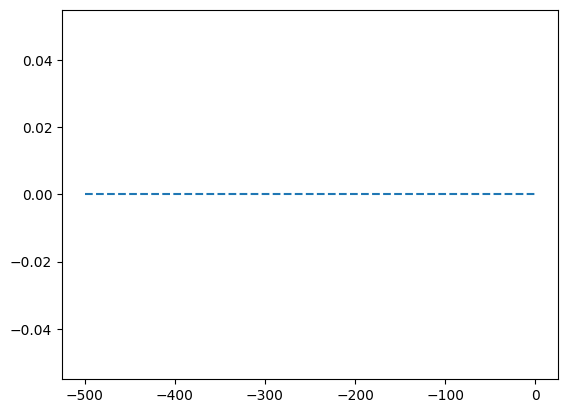

In [25]:
plt.plot(rhos,k1,linestyle="dashed", label="k1")
plt.plot(rhos,k2, label="k2")
plt.yscale("log")
plt.legend()

In [40]:
k1_sum

99999.99999999997

In [41]:
k2_sum

255.25999999999996

In [42]:
k1_sum/k2_sum

391.75742380318104

In [3]:
1E-5

1e-05

In [3]:
gk2(-100)

(-8.581314732288073e-05, -9.799668412154391e-05)

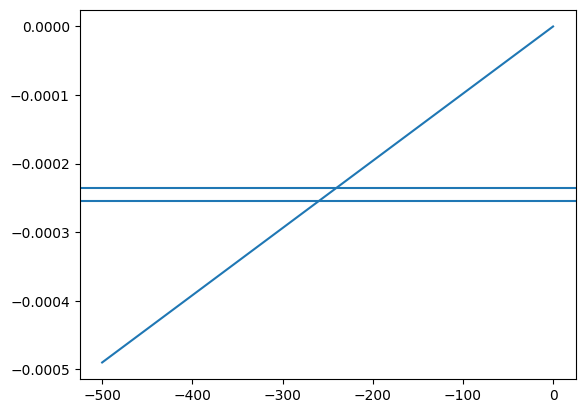

In [63]:
delta_gk1(-100)
x = np.linspace(-500,0,100)
y = np.vectorize(delta_gk1)(x)
plt.plot(x,y[1])
plt.axhline(d[1]+1E-5)
plt.axhline(d[1]-1E-5)

In [67]:
zipped = list(zip(*y))
zipped[0]

(np.float64(-0.0004290657366144036), np.float64(-0.0004899834206077196))

In [ ]:
adsf

Questions for Connor

1. Correct to sum up contributions of top and bottom cylinder?
2. For specific values (-250 k1) I get a large number.


